In [353]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing

In [354]:
import arff

with open("EEG Eye State.arff") as f:
    dataDictionary = arff.load(f)
    f.close()
    
arffData = np.array(dataDictionary['data'])
## ref https://stackoverflow.com/questions/48573169/how-to-import-csv-or-arff-to-scikit


In [355]:
arffData.shape
arffData[1:10,:]


array([['4324.62', '4004.62', '4293.85', '4148.72', '4342.05', '4586.67',
        '4097.44', '4638.97', '4210.77', '4226.67', '4207.69', '4279.49',
        '4632.82', '4384.1', '0'],
       ['4327.69', '4006.67', '4295.38', '4156.41', '4336.92', '4583.59',
        '4096.92', '4630.26', '4207.69', '4222.05', '4206.67', '4282.05',
        '4628.72', '4389.23', '0'],
       ['4328.72', '4011.79', '4296.41', '4155.9', '4343.59', '4582.56',
        '4097.44', '4630.77', '4217.44', '4235.38', '4210.77', '4287.69',
        '4632.31', '4396.41', '0'],
       ['4326.15', '4011.79', '4292.31', '4151.28', '4347.69', '4586.67',
        '4095.9', '4627.69', '4210.77', '4244.1', '4212.82', '4288.21',
        '4632.82', '4398.46', '0'],
       ['4321.03', '4004.62', '4284.1', '4153.33', '4345.64', '4587.18',
        '4093.33', '4616.92', '4202.56', '4232.82', '4209.74', '4281.03',
        '4628.21', '4389.74', '0'],
       ['4319.49', '4001.03', '4280.51', '4151.79', '4343.59', '4584.62',
        '40

In [356]:
## divide X and y and change data type!
X = np.array(arffData[:,0:13]).astype(np.float64)
y = np.array(arffData[:,14]).astype(np.int32)

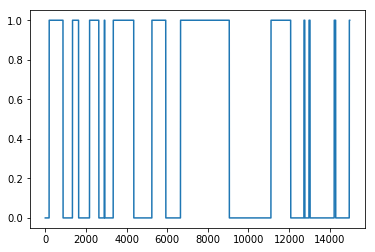

In [357]:
plt.plot(y)

In [358]:
from sklearn.model_selection import train_test_split

trainX, testX , trainy, testy = train_test_split(X,y, test_size= 0.1 , shuffle= False,random_state= 1)


In [359]:
# K-nearest neighbors -> overall data one time coding
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors =3)

model.fit(trainX, trainy)

yhat = model.predict(testX)

score = accuracy_score(testy, yhat)
print(score)



0.4893190921228304


In [360]:
# k-nearest neighbors ->  to use 3 consecutive input!


historyX, historyY = [x for x in trainX] , [x for x in trainy]

predictions = []

for i in range(len(testy)):
    model = KNeighborsClassifier(n_neighbors=3)
    
    model.fit(np.array(historyX), np.array(historyY))
    
    yhat = model.predict([testX[i,:]])[0]
    
    
    
    predictions.append(yhat)
    
    historyX.append(testX[i, :].astype(np.float64))
    historyY.append(testy[i])
    
score = accuracy_score(testy, predictions)
print(score)
        

0.9412550066755674


In [361]:
score = accuracy_score(testy, predictions)
print(score)
pred= np.array(predictions)
acc = np.mean(pred == testy)
print('Accuracy on the training data is {0:f}'.format(acc))

0.9412550066755674
Accuracy on the training data is 0.941255


In [362]:
## by using n_neighbors, Find the most not useful feature!


n_neighbors = np.array([1,2,3,4,5,10,15,20,25,30])



acc = np.zeros(len(n_neighbors))

for ia, a in enumerate(n_neighbors):
    historyX, historyY = [x for x in trainX] , [x for x in trainy]
    model = KNeighborsClassifier(n_neighbors= a)
    predictions = []
    
    for i in range(len(testy)):
        
    
        model.fit(np.array(historyX), np.array(historyY))
    
        yhat = model.predict([testX[i,:]])[0]
        
    
    
        predictions.append(yhat)
    
        historyX.append(testX[i, :].astype(np.float64))
        historyY.append(testy[i])
    score = accuracy_score(testy, predictions)
    acc[ia] = score
    print("fold %d"%(ia))


fold 0
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9


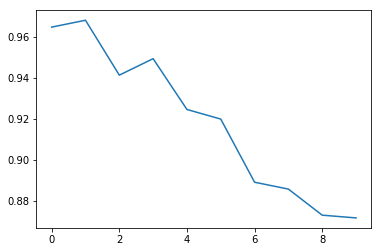

In [363]:
plt.plot(acc)

In [364]:
# making the prediction be impacted by the previous n - sequence data.(n is number of data)
historyX, historyY = [x for x in trainX] , [x for x in trainy]
# initialize history data
predictions = []

for i in range(len(testy)):
    model = KNeighborsClassifier(n_neighbors=2)
    # use the best accruacy result from above experiment.
    
    model.fit(np.array(historyX), np.array(historyY))
    
    tmpX, tmpy = np.array(historyX)[-10:,:] , np.array(historyY)[-10:]
    # get the previous 10 sequence
    model.fit(tmpX,tmpy)
    
    
    
    yhat = model.predict([testX[i,:]])[0]
    # predict
    

    
    
    predictions.append(yhat)
    
    historyX.append(testX[i, :].astype(np.float64))
    historyY.append(testy[i])
    # append the test data to train for next prediction
score = accuracy_score(testy, predictions)
print(score)

0.9939919893190922


In [365]:
# do the iteration to find best range

dataSequence = [2,3,4,5,10, 15, 20 ,25 , 30 ]

acc = np.zeros(len(dataSequence))

for ia, a in enumerate(dataSequence):
    historyX, historyY = [x for x in trainX] , [x for x in trainy]
    model = KNeighborsClassifier(n_neighbors= 2)
    predictions = []
    
    for i in range(len(testy)):
        
        tmpX, tmpy = np.array(historyX)[-a:,:] , np.array(historyY)[-a:]
        model.fit(tmpX,tmpy)
        

        yhat = model.predict([testX[i,:]])[0]
        
    
    
        predictions.append(yhat)
    
        historyX.append(testX[i, :].astype(np.float64))
        historyY.append(testy[i])
    score = accuracy_score(testy, predictions)
    acc[ia] = score
    print("fold %d"%(ia))

fold 0
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8


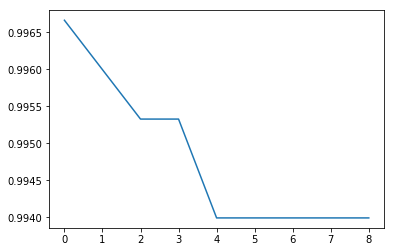

In [366]:
plt.plot(acc)

In [367]:
## start pytorch

import torch
import torch.utils.data
from torch.autograd import Variable
from sklearn import linear_model, preprocessing
Xs = preprocessing.scale(trainX)
testXs = preprocessing.scale(testX)
X_torch = torch.Tensor(Xs)
y_torch = torch.Tensor(trainy)
Xtest_torch = torch.Tensor(testX)
ytest_torch = torch.Tensor(testy)

dataset = torch.utils.data.TensorDataset(X_torch,y_torch)
loader = torch.utils.data.DataLoader(dataset, batch_size = 100,shuffle=False)
testDataset= torch.utils.data.TensorDataset(Xtest_torch,ytest_torch)
testloader = torch.utils.data.DataLoader(dataset, batch_size = 100,shuffle=False)

        

In [368]:
import torch.nn as nn
class LSTM(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1,
                    num_layers=2):
        super(LSTM, self).__init__()
        
        self.hidden_dim = hidden_dim
        self.input_size = input_dim
        self.layer_dim = num_layers
        self.batch_size = batch_size
        # Define the RNN layer
        self.linear = nn.Linear(self.input_size, self.hidden_dim)
        self.lstm = nn.LSTM( self.hidden_dim , self.hidden_dim, self.layer_dim, batch_first =True ,dropout=0.1)
        

        # Define the output layer
        
        self.linear2 = nn.Linear(self.hidden_dim, output_dim)
        
        self.sigmoid = nn.Sigmoid()
    

    def forward(self, input):
         # Initialize hidden state with zeros
        out = self.linear(input)
        out, self.hidden = self.lstm(out)
        
        out = self.sigmoid(self.linear2(out))
        
        # One time step
        
        
        return out
## size 128

In [369]:
input_dim = 13
hidden_dim = 128

model = LSTM(input_dim = input_dim,hidden_dim=hidden_dim , batch_size=100)

In [373]:
import torch.optim as optim

opt = optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.BCELoss()
print(str(model))

LSTM(
  (linear): Linear(in_features=13, out_features=128, bias=True)
  (lstm): LSTM(128, 128, num_layers=2, batch_first=True, dropout=0.1)
  (linear2): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [376]:
num_epoch = 75

a_loss = np.zeros([num_epoch])
a_accuracy = np.zeros([num_epoch])

for epoch in range(num_epoch):
    error = 0
    total = 0
    batch_loss = []
    for batch, data in enumerate(loader):
        x_batch,y_batch = data
        x_batch = x_batch.view(1,x_batch.shape[0],13)
        y_batch = y_batch.view(-1,1)
        out = model(x_batch)
        
        loss= criterion(out,y_batch)
        batch_loss.append(loss.item())
        
        opt.zero_grad()
        loss.backward()
        
        opt.step()
        
        
        guess = out.round()
        error += torch.sum(torch.abs(guess-y_batch))
        total += len(y_batch)
        
    accuracy = 100*(1-error/total)
    a_loss[epoch] = np.mean(batch_loss)
    a_accuracy[epoch] = accuracy
    print("fold %d ->acc= %f , loss = %f "%(epoch,a_accuracy[epoch] , a_loss[epoch]))


D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\torch\nn\functional.py:2016: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([1, 100, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\torch\nn\functional.py:2016: UserWarning: Using a target size (torch.Size([82, 1])) that is different to the input size (torch.Size([1, 82, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


fold 0 ->acc= 83.845123 , loss = 0.352630 
fold 1 ->acc= 85.565933 , loss = 0.331849 
fold 2 ->acc= 85.017059 , loss = 0.324784 
fold 3 ->acc= 86.567276 , loss = 0.300740 
fold 4 ->acc= 86.537605 , loss = 0.285856 
fold 5 ->acc= 88.992729 , loss = 0.264820 
fold 6 ->acc= 89.593529 , loss = 0.243706 
fold 7 ->acc= 88.940811 , loss = 0.242477 
fold 8 ->acc= 89.096573 , loss = 0.243201 
fold 9 ->acc= 88.466103 , loss = 0.257278 
fold 10 ->acc= 90.157249 , loss = 0.239722 
fold 11 ->acc= 89.103989 , loss = 0.239060 
fold 12 ->acc= 89.333931 , loss = 0.208814 
fold 13 ->acc= 89.875389 , loss = 0.215996 
fold 14 ->acc= 88.021065 , loss = 0.228032 
fold 15 ->acc= 90.617119 , loss = 0.205273 
fold 16 ->acc= 90.765465 , loss = 0.211090 
fold 17 ->acc= 93.317017 , loss = 0.160056 
fold 18 ->acc= 91.655540 , loss = 0.197022 
fold 19 ->acc= 94.058746 , loss = 0.142617 
fold 20 ->acc= 93.917816 , loss = 0.147767 
fold 21 ->acc= 93.220589 , loss = 0.150699 
fold 22 ->acc= 92.812637 , loss = 0.169087

KeyboardInterrupt: 

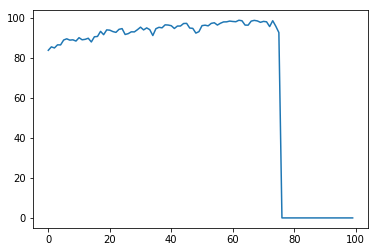

In [377]:
plt.plot(a_accuracy)

In [378]:
# predict the test data
error =0
total = 0
acc = 0

with torch.no_grad():
    for data in testloader:
        x_batch,y_batch = data
        x_batch = x_batch.view(1,x_batch.shape[0],13)
        y_batch = y_batch.view(-1,1)
        out = model(x_batch)
        guess = out.round()
        error += torch.sum(torch.abs(guess-y_batch))
        total += len(y_batch)
        
    accuracy = 100*(1-error/total)
    
    acc = accuracy
    print("acc in test data = %f "%(acc))

acc in test data = 96.654800 
